In [1]:
import os
import random
from PIL import Image
import numpy as np
import torch
import matplotlib.pyplot as plt

from clip_util import load_custom_clip_model, load_basic_clip_model, get_text_features, get_image_features, compute_similarity, classify_image, CLIPFineTuner
from classes import get_candidate_captions

In [2]:
basic_model, basic_preprocess, basic_device = load_basic_clip_model()
custom_model, custom_preprocess, custom_device = load_custom_clip_model("../clip_finetuned.pt", 13)


Custom model: CLIP(
  (visual): VisionTransformer(
    (conv1): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
    (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): Sequential(
        (0): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=768, out_features=3072, bias=True)
            (gelu): QuickGELU()
            (c_proj): Linear(in_features=3072, out_features=768, bias=True)
          )
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
        (1): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=Tr

In [3]:
corn_dataset = {
    "common_rust": "../dataset/corn/common_rust",
    "gray_leaf_spot": "../dataset/corn/gray_leaf_spot",
    "healthy": "../dataset/corn/healthy",
    "northern_leaf_blight": "../dataset/corn/northern_leaf_blight",
}

potato_dataset = {
    "early_blight": "../dataset/potato/early_blight",
    "late_blight": "../dataset/potato/late_blight",
}

rice_dataset = {
    "brown_spot": "../dataset/rice/brown_spot",
    "healthy": "../dataset/rice/healthy",
    "leaf_blast": "../dataset/rice/leaf_blast",
    "neck_blast": "../dataset/rice/neck_blast",
}

wheat_dataset = {
    "healthy": "../dataset/wheat/healthy",
    "brown_rust": "../dataset/wheat/brown_rust",
    "yellow_rust": "../dataset/wheat/yellow_rust",
}


In [4]:
def get_random_image_from_folder(folder_path):
    images = [os.path.join(folder_path, img) for img in os.listdir(folder_path)]
    if images:
        return random.choice(images)
    else:
        raise ValueError(f"No images found in folder {folder_path}")

In [5]:
def display_comparison(image_path, basic_classified_class, basic_similarity_score, custom_classified_class, custom_similarity_score):
    # Display the image
    image = Image.open(image_path)
    fig, axs = plt.subplots(1, 2, figsize=(8, 3))  # Create a figure with 1 row and 2 columns
    
    # Display the image classified by basic CLIP
    axs[0].imshow(image)
    axs[0].set_title(f"Basic CLIP: {basic_classified_class}\nSimilarity Score: {basic_similarity_score:.4f}")
    axs[0].axis('off')
    
    # Display the image classified by custom CLIP
    axs[1].imshow(image)
    axs[1].set_title(f"Custom CLIP: {custom_classified_class}\nSimilarity Score: {custom_similarity_score:.4f}")
    axs[1].axis('off')

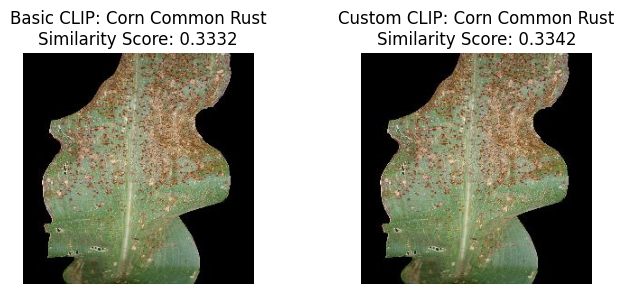

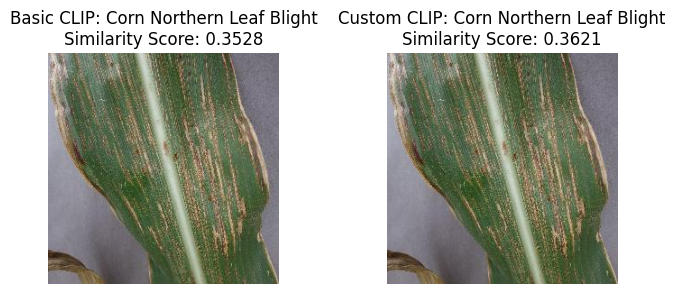

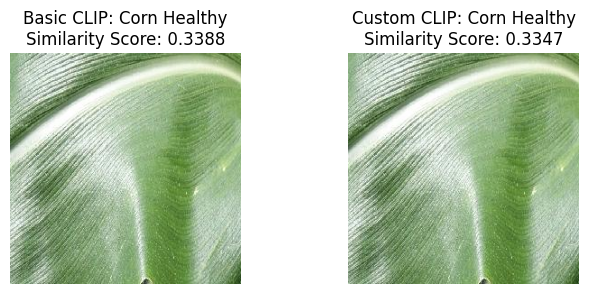

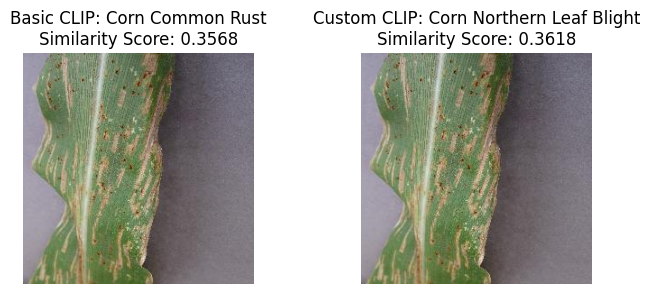

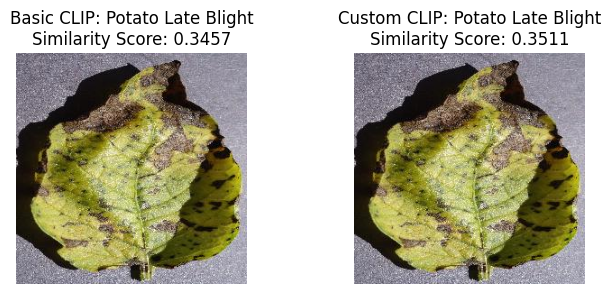

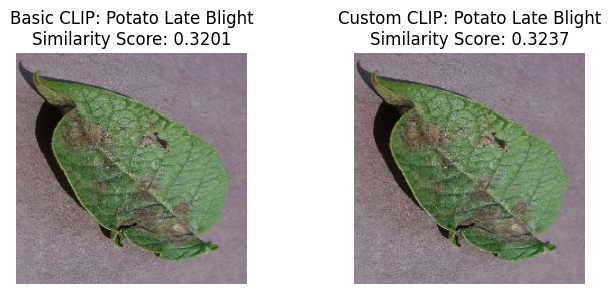

KeyboardInterrupt: 

In [ ]:
datasets = [corn_dataset, potato_dataset, rice_dataset, wheat_dataset]

for dataset in datasets:
    for class_name, folder_path in dataset.items():
        # Extract correct class from directory path
        parts = folder_path.strip("/").split("/")
        actual_class = f"{parts[-2].capitalize()}: {parts[-1].replace('_', ' ').capitalize()}"
        print(f"Classifying images from {actual_class}...")
        image_path = get_random_image_from_folder(folder_path)
        image = Image.open(image_path)
        basic_classified_class, basic_best_caption, basic_similarity_score = classify_image(image_path, basic_model, basic_preprocess, basic_device)
        custom_classified_class, custom_best_caption, custom_similarity_score = classify_image(image_path, custom_model, custom_preprocess, custom_device)
        display_comparison(image_path, basic_classified_class, basic_similarity_score, custom_classified_class, custom_similarity_score)
        plt.show()

#image_path = get_random_image_from_folder(corn_dataset["common_rust"])




In [11]:
basic_classified_class, basic_best_caption, basic_similarity_score = classify_image(image_path, basic_model, basic_preprocess, basic_device)

custom_classified_class, custom_best_caption, custom_similarity_score = classify_image(image_path, custom_model, custom_preprocess, custom_device)

#print(f"Classified Class: {classified_class}")
#print(f"Best Caption: {best_caption}")
#print(f"Similarity Score: {similarity_score}")

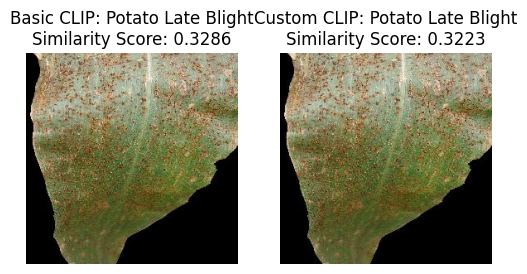

In [30]:
display_comparison(image_path, basic_classified_class, basic_similarity_score, custom_classified_class, custom_similarity_score)